In [2]:
import pandas as pd
import numpy as np

### strutture dati fondamentali
- Series
- DataFrame

In [2]:
obj = pd.Series([4,7,-5,3])

In [3]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
arr = np.array([4.3,-1,0])
obj_float = pd.Series(arr)

In [6]:
obj_float

0    4.3
1   -1.0
2    0.0
dtype: float64

In [7]:
obj.array

<PandasArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [8]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [15]:
obj2 = pd.Series([4,7,-5,1], index=["a","b","c","d"])

In [14]:
obj2

a    4
b    7
c   -5
1    1
dtype: int64

In [19]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [21]:
obj2[["a","b"]]

a    4
b    7
dtype: int64

In [22]:
obj2>0

a     True
b     True
c    False
d     True
dtype: bool

In [23]:
obj2*2

a     8
b    14
c   -10
d     2
dtype: int64

In [24]:
np.exp(obj2)

a      54.598150
b    1096.633158
c       0.006738
d       2.718282
dtype: float64

# Esercizio
### Proviamo a creare un dizionario e trasformarlo una Serie pandas semplicemente passandolo  in ingresso al costruttore, poi lo ritrasformiamo con il metodo to_dict() delle Serie pandas. 
### Infine creiamo un altra pandas serie usando un dizionario e come indice una lista che ha qualche elemento in comune con un dizionario e vediamo cosa succede

In [29]:
stati = pd.Series([1,2,3,4,np.nan], index= ["Ohio","Texas", "Utah","Alabama","Idaho"])

In [30]:
stati

Ohio       1.0
Texas      2.0
Utah       3.0
Alabama    4.0
Idaho      NaN
dtype: float64

In [31]:
pd.isna(stati)

Ohio       False
Texas      False
Utah       False
Alabama    False
Idaho       True
dtype: bool

In [37]:
stati2 = pd.notna(stati) # per copiaaa!

In [38]:
stati2["Ohio"] = 10

In [41]:
stati["New Mexico"] = 9

In [42]:
stati

Ohio          1.0
Texas         2.0
Utah          3.0
Alabama       4.0
Idaho         NaN
New Mexico    9.0
dtype: float64

In [43]:
stati + stati2

Alabama        5.0
Idaho          NaN
New Mexico     NaN
Ohio          11.0
Texas          3.0
Utah           4.0
dtype: object

In [47]:
stati.name = "rating"
stati.index.name = "state"

### pd Serie per riferimento:

In [48]:
r = np.array([1, 2])
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999

In [49]:
r

array([999,   2])

In [52]:
ser.size

2

In [55]:
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories, index = ["day1", "day2","day4"])
print(myvar)

day1    420.0
day2    380.0
day4      NaN
dtype: float64


### cosa notiamo dalla precedente cella?

### Series multindices

In [125]:
data = [10, 20, 30, 40, 50, 60]
index = [('A', 'X'), ('A', 'Y'), ('A', 'Z'), ('B', 'X'), ('B', 'Y'), ('B', 'Z')]

# Creazione della Series con indice multi-livello
s = pd.Series(data, index=index)
s

(A, X)    10
(A, Y)    20
(A, Z)    30
(B, X)    40
(B, Y)    50
(B, Z)    60
dtype: int64

In [127]:
s.index

Index([('A', 'X'), ('A', 'Y'), ('A', 'Z'), ('B', 'X'), ('B', 'Y'), ('B', 'Z')], dtype='object')

In [130]:
s.values

array([10, 20, 30, 40, 50, 60], dtype=int64)

## DataFrame

### Creare un dataframe da un dizionario di liste di uguale dimensione

In [4]:
data = {"state" : ["italy", "france","germany","spain","italy"], "year" : [2000,2001,2000,1999,1998], "pop" : [59,70,80,48,57] }
df = pd.DataFrame(data)

In [5]:
df

,state,year,pop
0,italy,2000,59
1,france,2001,70
2,germany,2000,80
3,spain,1999,48
4,italy,1998,57


In [7]:
df.head() #df.tail()

,state,year,pop
0,italy,2000,59
1,france,2001,70
2,germany,2000,80
3,spain,1999,48
4,italy,1998,57


In [207]:
#Estrarre una serie da un df
s = df.iloc[0]

col_0    1.00
col_1    2.30
col_2    5.29
col_3     NaN
col_4     NaN
Name: 0, dtype: float64

In [209]:
#s?

In [12]:
new_df = pd.DataFrame(data, columns=["year", "state", "pop", "debt"]) #notiamo due cose!

In [13]:
new_df

,year,state,pop,debt
0,2000,italy,59,NaN
1,2001,france,70,NaN
2,2000,germany,80,NaN
3,1999,spain,48,NaN
4,1998,italy,57,NaN


In [11]:
df.year

0    2000
1    2001
2    2000
3    1999
4    1998
Name: year, dtype: int64

In [14]:
df["year"]

0    2000
1    2001
2    2000
3    1999
4    1998
Name: year, dtype: int64

In [17]:
new_df.loc[0]

year      2000
state    italy
pop         59
debt       NaN
Name: 0, dtype: object

In [25]:
new_df["debt"] = np.arange(5)

In [108]:
new_df

,state,pop,debt,small
0,italy,59,0,False
1,france,70,1,True
2,germany,80,2,True
3,spain,48,3,False
4,italy,57,4,False


In [111]:
#ordiniamolo per popolazione
new_df.sort_values(by='pop', ascending=True)

,state,pop,debt,small
3,spain,48,3,False
4,italy,57,4,False
0,italy,59,0,False
1,france,70,1,True
2,germany,80,2,True


# Proviamo insieme
- Se cerco di ordinare una serie o un DF ma sono presenti dei nan posso decidere dove metterli. Con il parametro na_position.
- Ordiniamo un dataframe per indici e poi per colonne
- Posso avere un indice o una colonna duplicata in un DF?
- 

In [32]:
new_df.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [33]:
del new_df["year"]

In [35]:
new_df["small"] = new_df["pop"] >= 60

In [36]:
new_df

,state,pop,debt,small
0,italy,59,0,False
1,france,70,1,True
2,germany,80,2,True
3,spain,48,3,False
4,italy,57,4,False


## Prova a creare o cancellare una colonna usando la dot notation!

### Creare un DataFrame da un dizionario con dizionari annidati

In [55]:
populations = pd.DataFrame({"Italy" : {2000: 59, 1998 : 57}, "germany" : {2001 : 80} })
populations

,Italy,germany
2000,59.0,NaN
1998,57.0,NaN
2001,NaN,80.0


In [56]:
populations.T

,2000,1998,2001
Italy,59.0,57.0,NaN
germany,NaN,NaN,80.0


Rinominare le colonne di un dataframe:

In [63]:
populations.columns = ["france", "spain"] # 1o metodo, rinominarle tutte!
populations

,france,spain
2000,59.0,NaN
1998,57.0,NaN
2001,NaN,80.0


In [65]:
populations.rename(columns={"spain":"germany"})# 2o metodo: Rinominare colonne specifiche

,france,germany
2000,59.0,NaN
1998,57.0,NaN
2001,NaN,80.0


In [67]:
populations = populations.rename(columns=lambda x: x.upper() + '_col')
populations

,FRANCE_col,SPAIN_col
2000,59.0,NaN
1998,57.0,NaN
2001,NaN,80.0


In [68]:
populations.dtypes

FRANCE_col    float64
SPAIN_col     float64
dtype: object

In [88]:
#accedere a un elemento:
populations.at[2000,"FRANCE_col"]

59.0

In [136]:
#accedere a una o piu righe:
populations.iloc[1:]

,FRANCE_col,SPAIN_col
1998,57.0,NaN
2001,NaN,80.0


In [139]:
#accedeere a una o piu colonne
populations[["FRANCE_col","SPAIN_col"]]

,FRANCE_col,SPAIN_col
2000,59.0,NaN
1998,57.0,NaN
2001,NaN,80.0


In [142]:
#metodo loc
populations.loc[[2000,2001],:]

,FRANCE_col,SPAIN_col
2000,59.0,NaN
2001,NaN,80.0


In [145]:
#metodo iloc
populations.iloc[1:3,:]

,FRANCE_col,SPAIN_col
1998,57.0,NaN
2001,NaN,80.0


In [115]:
populations.mean() # notiamo che non tiene conto dei valori Nan

FRANCE_col    58.0
SPAIN_col     80.0
dtype: float64

In [119]:
populations.fillna(1)

,FRANCE_col,SPAIN_col
2000,59.0,1.0
1998,57.0,1.0
2001,1.0,80.0


In [121]:
obj = populations.stack() # cosa ritorna?
obj

2000  FRANCE_col    59.0
1998  FRANCE_col    57.0
2001  SPAIN_col     80.0
dtype: float64

In [122]:
list(obj.index)

[(2000, 'FRANCE_col'), (1998, 'FRANCE_col'), (2001, 'SPAIN_col')]

### In generale possiamo passare molte cose ad un dataframe per l'inizializzazione:
- 2D array
- dizionario di array, liste o tuple
- dizionario di pandas series
- Lista di dizionari
- lista di liste o di tuple
- un dataframe
- dizionario di dizioniari

In [48]:
arr1 = np.arange(0,10,0.1)
arr1 = arr1.reshape(50,2)

df_from_arr = pd.DataFrame(arr1)

In [50]:
df_from_arr.tail()

,0,1
45,9.0,9.1
46,9.2,9.3
47,9.4,9.5
48,9.6,9.7
49,9.8,9.9


In [105]:
#Sommiamo righe o colonne di un df
df_from_arr.sum(axis=0) # o axis=1

0    245.0
1    250.0
dtype: float64

In [271]:
### Cosa succede se ho dei valori nan?
df_from_arr.loc[len(df_from_arr)] = [np.nan,0,np.nan]

In [276]:
df_from_arr.sum(axis=1) #, skipna = False

0      7.1
1      7.5
2      3.9
3      4.3
4      4.7
5      0.0
6     11.5
7      7.9
8      5.3
9      7.7
10    13.1
11     9.5
12    10.9
13    11.3
14    13.7
15    12.1
16    11.5
17     7.9
18    15.3
19     8.7
20    10.1
21    12.5
22    10.9
23    16.3
24    11.7
25    14.1
26    17.5
27    13.9
28    18.3
29    12.7
30    16.1
31    19.5
32    15.9
33    22.3
34    22.7
35    19.1
36    15.5
37    17.9
38    23.3
39    16.7
40    20.1
41    19.5
42    19.9
43    26.3
44    19.7
45    21.1
46    26.5
47    25.9
48    21.3
49    24.7
50     0.0
51     0.0
52     0.0
dtype: float64

### Esercizio:

Crea un dataframe a partire da un dizionario di 10 pandas series che rappresenti la matrice di Vandermonde (vedi foto) dove gli elementi sono [2.3,12,-7,9,4.3]

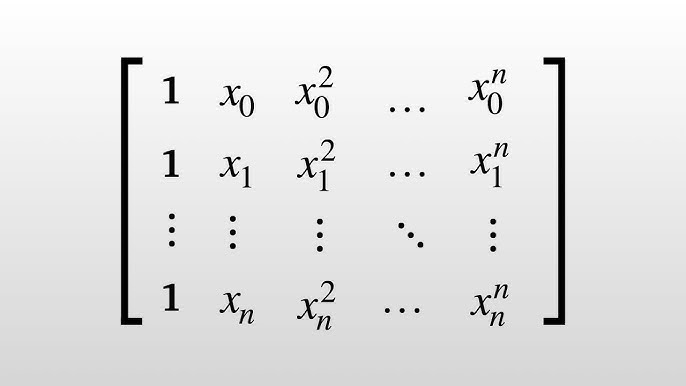

In [71]:
from IPython.display import Image

# Carica un'immagine dal file system
display(Image(filename='../data/vander_matrix.jpg'))

# Esercizio: Funzionalità Base di Pandas sulla Matrice di Vandermonde

## Consegna 1: Selezionare Colonne e Righe Specifiche
1. **Seleziona la colonna `col_2` del DataFrame e visualizzala.**
2. **Seleziona le righe dalla seconda alla quarta (incluse) del DataFrame e visualizzale.**

## Consegna 2: Modificare il DataFrame
1. **Aggiungi una nuova colonna al DataFrame chiamata `sum` che contenga la somma di tutte le colonne per ciascuna riga.**
2. **Sostituisci tutti i valori negativi del DataFrame con `NaN` (Not a Number).**

## Consegna 3: Operazioni di Filtraggio e Ordinamento
1. **Filtra il DataFrame per mostrare solo le righe in cui la colonna `col_4` è maggiore di 1000.**
2. **Ordina il DataFrame in base ai valori della colonna `col_1` in ordine decrescente.**

## Consegna 4: Analisi Statistica
1. **Calcola la media, il minimo e il massimo dei valori di ciascuna colonna del DataFrame.**
2. **Dopo aver modificato 5 valori casuali del DataFrame in Nan, Visualizza il numero di valori non `NaN` per ciascuna colonna.**
3. **Riempi i valori nan con zero un metodo specifico dei pandas df**

## Consegna 5: Salvataggio e Caricamento del DataFrame
1. **Salva il DataFrame in un file CSV chiamato `vandermonde.csv`.**
2. **Carica il DataFrame dal file `vandermonde.csv` in un nuovo DataFrame e visualizzalo.**ù


In [151]:
df_from_arr[2] = np.random.randint(1,10,50)

In [173]:
df_from_arr

,0,1,2
0,0.0,0.1,7
1,0.2,0.3,7
2,0.4,0.5,3
3,0.6,0.7,3
4,0.8,0.9,3
5,1.0,1.1,7
6,1.2,1.3,9
7,1.4,1.5,5
8,1.6,1.7,2
9,1.8,1.9,4


In [171]:
#valutare l'appartenenza
49 in df_from_arr.index

True

In [172]:
49 in df_from_arr.columns

False

In [175]:
#aggiungere indici:
df_from_arr.reindex([x for x in np.arange(-5,50)])

,0,1,2
-5,NaN,NaN,NaN
-4,NaN,NaN,NaN
-3,NaN,NaN,NaN
-2,NaN,NaN,NaN
-1,NaN,NaN,NaN
0,0.0,0.1,7.0
1,0.2,0.3,7.0
2,0.4,0.5,3.0
3,0.6,0.7,3.0
4,0.8,0.9,3.0


In [177]:
#dropping entries:
df

,col_0,col_1,col_2,col_3,col_4
0,1.0,2.3,5.29,NaN,NaN
1,1.0,NaN,NaN,1728.0,NaN
2,1.0,NaN,49.00,NaN,NaN
3,NaN,9.0,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,341.8801


In [180]:
df.drop(3)

,col_0,col_1,col_2,col_3,col_4
0,1.0,2.3,5.29,NaN,NaN
1,1.0,NaN,NaN,1728.0,NaN
2,1.0,NaN,49.00,NaN,NaN
4,1.0,NaN,NaN,NaN,341.8801


In [184]:
#droppare colonne:
df2 = df.drop("col_3", axis=1)

In [186]:
df2.drop(0)

,col_0,col_1,col_2,col_4
1,1.0,NaN,NaN,NaN
2,1.0,NaN,49.0,NaN
3,NaN,9.0,NaN,NaN
4,1.0,NaN,NaN,341.8801


In [189]:
df2 # cosa notiamo?

,col_0,col_1,col_2,col_4
0,1.0,2.3,5.29,NaN
1,1.0,NaN,NaN,NaN
2,1.0,NaN,49.00,NaN
3,NaN,9.0,NaN,NaN
4,1.0,NaN,NaN,341.8801


### Aritmetica con pandas

SERIES

In [192]:
s1 = pd.Series([7.3,34,-12], index = ["a","b","c"])
s2 = pd.Series([-2.1,23,0,2,1], index = ["a","b","c","d","e"])

In [193]:
s1+s2

a     5.2
b    57.0
c   -12.0
d     NaN
e     NaN
dtype: float64

DATAFRAME

In [197]:
df1 = pd.DataFrame(np.arange(9.).reshape(3,3), columns=list("bcd"), index=["nord","centro","sud"])
df2 = pd.DataFrame(np.arange(12.).reshape(4,3), columns=list("bde"), index=["nord","centro","sud","isole"])


In [198]:
df1

,b,c,d
nord,0.0,1.0,2.0
centro,3.0,4.0,5.0
sud,6.0,7.0,8.0


In [199]:
df2

,b,d,e
nord,0.0,1.0,2.0
centro,3.0,4.0,5.0
sud,6.0,7.0,8.0
isole,9.0,10.0,11.0


In [200]:
df1+df2

,b,c,d,e
centro,6.0,NaN,9.0,NaN
isole,NaN,NaN,NaN,NaN
nord,0.0,NaN,3.0,NaN
sud,12.0,NaN,15.0,NaN


In [202]:
df1.add(df2, fill_value=0)

,b,c,d,e
centro,6.0,4.0,9.0,5.0
isole,9.0,NaN,10.0,11.0
nord,0.0,1.0,3.0,2.0
sud,12.0,7.0,15.0,8.0


In [ ]:
sum

In [203]:
df1.reindex(columns=df2.columns, fill_value=1)

,b,d,e
nord,0.0,2.0,1
centro,3.0,5.0,1
sud,6.0,8.0,1


In [213]:
s = pd.Series([1,2,3,4], index = list("abde"))

In [215]:
s

a    1
b    2
d    3
e    4
dtype: int64

In [218]:
df1 + s

,a,b,c,d,e
nord,NaN,2.0,NaN,5.0,NaN
centro,NaN,5.0,NaN,8.0,NaN
sud,NaN,8.0,NaN,11.0,NaN


In [219]:
df1-s

,a,b,c,d,e
nord,NaN,-2.0,NaN,-1.0,NaN
centro,NaN,1.0,NaN,2.0,NaN
sud,NaN,4.0,NaN,5.0,NaN


In [225]:
df1.sub(s, axis='columns')

,a,b,c,d,e
nord,NaN,-2.0,NaN,-1.0,NaN
centro,NaN,1.0,NaN,2.0,NaN
sud,NaN,4.0,NaN,5.0,NaN


### Esercizio:
Crea una pandas Series che abbia come indici gli indici di colonna di un dataframe e poi fai una sottrazione df - serie

### Applicazione di funzioni a un DataFrame

In [233]:
def f1(x):
    return x.max() + x.min() / 2

df2.apply(f1) # cosa sta ritornando?

b     9.0
d    10.5
e    12.0
dtype: float64

In [234]:
def f1(x):
    return x / 2

df2.apply(f1) # ora cosa sta ritornando?

,b,d,e
nord,0.0,0.5,1.0
centro,1.5,2.0,2.5
sud,3.0,3.5,4.0
isole,4.5,5.0,5.5


In [239]:
def f1(x):
    return f"{x:2f}"

df2.applymap(f1) # ora cosa sta ritornando?

,b,d,e
nord,0.000000,1.000000,2.000000
centro,3.000000,4.000000,5.000000
sud,6.000000,7.000000,8.000000
isole,9.000000,10.000000,11.000000


Differenza tra apply e applymap ? proviamo ad usare apply nell'ultim cella!

## Ranking dei valori

In [255]:
df = pd.DataFrame(np.random.randint(0, 100, size=(5, 3)), columns=['A', 'B', 'C'])
df

,A,B,C
0,36,12,32
1,56,49,62
2,35,57,12
3,24,69,15
4,13,85,20


In [256]:
df.rank()

,A,B,C
0,4.0,1.0,4.0
1,5.0,2.0,5.0
2,3.0,3.0,1.0
3,2.0,4.0,2.0
4,1.0,5.0,3.0


#### cosa succede di default se ho valori uguali? Posso cambiare la cosa?


### Un po' di Statistica con i DF

In [258]:
df.describe()

,A,B,C
count,5.000000,5.000000,5.000000
mean,32.800000,54.400000,28.200000
std,15.990622,27.309339,20.376457
min,13.000000,12.000000,12.000000
25%,24.000000,49.000000,15.000000
50%,35.000000,57.000000,20.000000
75%,36.000000,69.000000,32.000000
max,56.000000,85.000000,62.000000


#### altri metodi
- count
- argmin, argmax
- indxmin, idxmax
- quantile
- cumsum, cummin, cummax, ecc